[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Saving netflix_titles.csv to netflix_titles (2).csv

Preview:

Missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


/tmp/ipython-input-3-3551442766.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3-3551442766.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

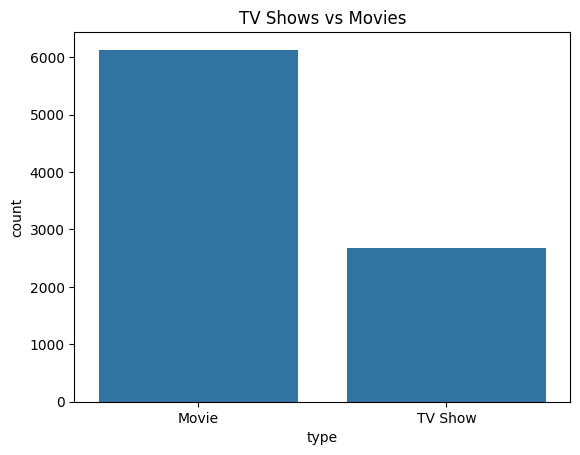

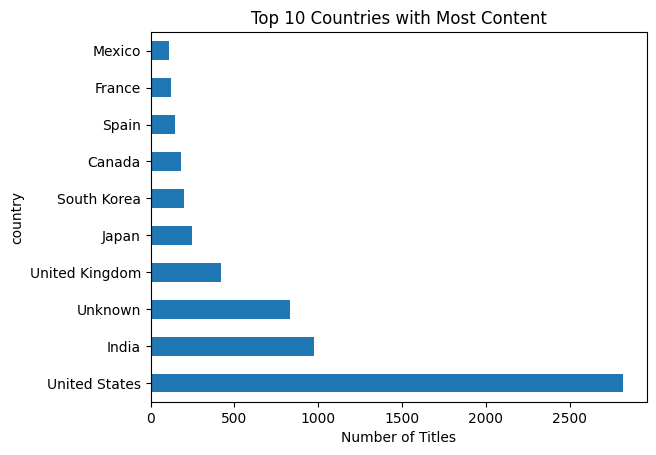

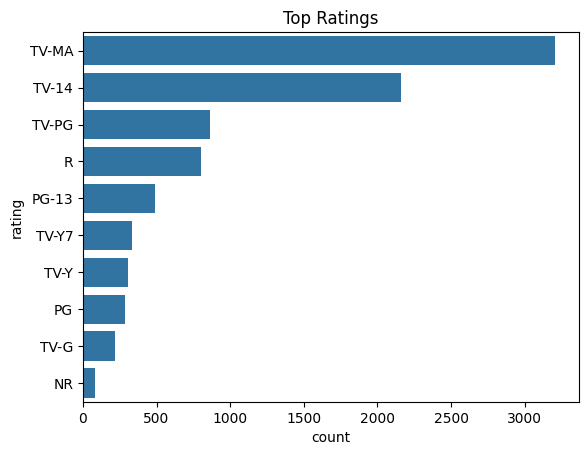

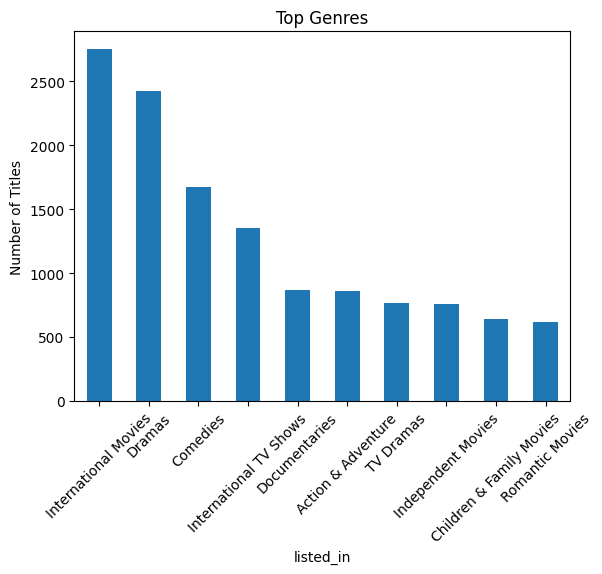

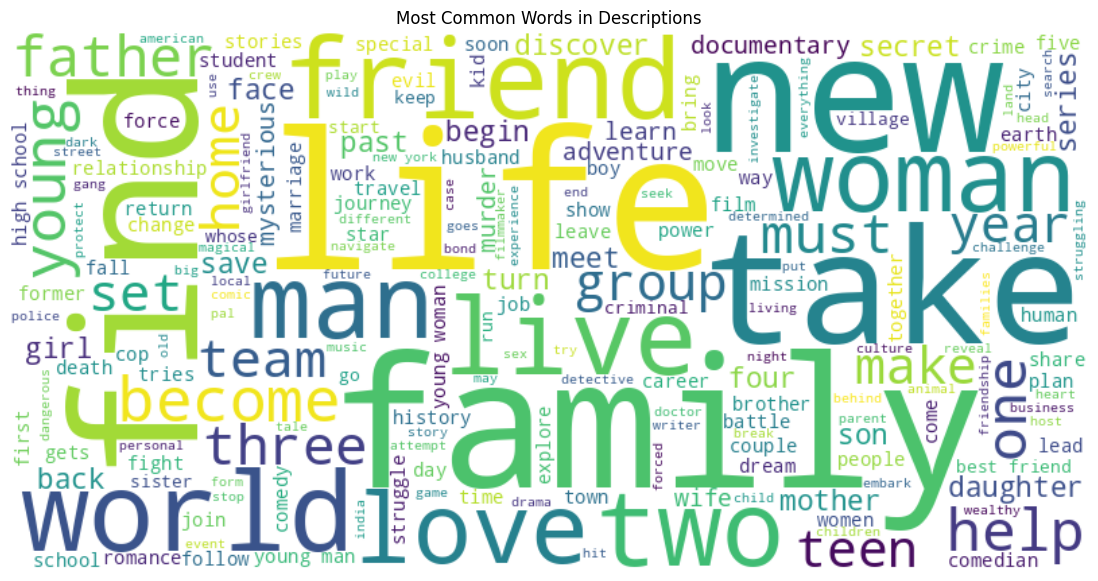


Improved Classification Report (Logistic Regression):

              precision    recall  f1-score   support

       Movie       0.82      0.73      0.77      1214
     TV Show       0.51      0.64      0.57       548

    accuracy                           0.70      1762
   macro avg       0.67      0.68      0.67      1762
weighted avg       0.72      0.70      0.71      1762


Cluster Sample Counts:
cluster
0    5836
2    1482
4     528
3     525
1     436
Name: count, dtype: int64

Cluster 0 Samples:
                              title  \
0              Dick Johnson Is Dead   
1                     Blood & Water   
6  My Little Pony: A New Generation   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
6  Equestria's divided. But a bright-eyed hero be...  

Cluster 1 Samples:
                      title                                        description
4            

In [3]:
!pip install -q seaborn wordcloud nltk scikit-learn
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

# STEP 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# STEP 3: Load your data
from google.colab import files
uploaded = files.upload()

# Replace with your actual filename (after upload)
df = pd.read_csv("netflix_titles.csv")

# STEP 4: Preview the data
print("\nPreview:")
df.head()

# STEP 5: Clean missing values
print("\nMissing values:")
print(df.isnull().sum())

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['description'].fillna('', inplace=True)

# STEP 6: TV vs Movie count
sns.countplot(data=df, x='type')
plt.title("TV Shows vs Movies")
plt.show()

# STEP 7: Top 10 countries by content count
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries with Most Content')
plt.xlabel("Number of Titles")
plt.show()

# STEP 8: Rating distribution
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10])
plt.title("Top Ratings")
plt.show()

# STEP 9: Genre analysis
all_genres = df['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)
top_genres.plot(kind='bar', title='Top Genres')
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# STEP 10: Word Cloud from Descriptions
text = " ".join(df['description'].dropna())
stop_words = set(stopwords.words('english'))
filtered_words = " ".join([word for word in nltk.word_tokenize(text.lower()) if word.isalpha() and word not in stop_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Descriptions")
plt.show()

# STEP 11: Predict Content Type Using Descriptions (Improved Classifier)
X = df['description']
y = df['type']

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("\nImproved Classification Report (Logistic Regression):\n")
print(classification_report(y_test, preds))

# STEP 12: Cluster Content Based on Description (Unsupervised Learning)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_tfidf)
df['cluster'] = kmeans.labels_

print("\nCluster Sample Counts:")
print(df['cluster'].value_counts())

# Export clustered samples
for i in range(5):
    print(f"\nCluster {i} Samples:")
    print(df[df['cluster'] == i][['title', 'description']].head(3))

# STEP 13: Top Terms per Cluster (to interpret clusters)
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("\nTop Keywords per Cluster:")
for i in range(5):
    print(f"\nCluster {i} keywords:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=', ')
    print()